In [1]:
import pandas as pd

#loading the dataset
file_path = "Global_Cybersecurity_Threats_2015-2024.csv"
df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None


In [2]:
df.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:
#check for missing values
mis_values = df.isnull().sum()
print("Missing values :\n", mis_values)

Missing values :
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [6]:
# check for duplicates

dupli = df.duplicated().sum()
print(f"Duplicate rows: {dupli}")

Duplicate rows: 0


In [7]:
print(df.dtypes)

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object


##EDA

In [8]:
import pandas as pd

# Summary statistics of numerical features
print(df.describe())


              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000  
50%               

In [9]:
#list of categorical columns
categorical_cols = ["Country", "Attack Type", "Target Industry", "Attack Source", "Security Vulnerability Type", "Defense Mechanism Used"]

#print value count for each category column
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())


Country:
 Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

Attack Type:
 Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

Target Industry:
 Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

Attack Source:
 Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

Security Vulnerability Type:
 Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

Defense Mech

Visualization

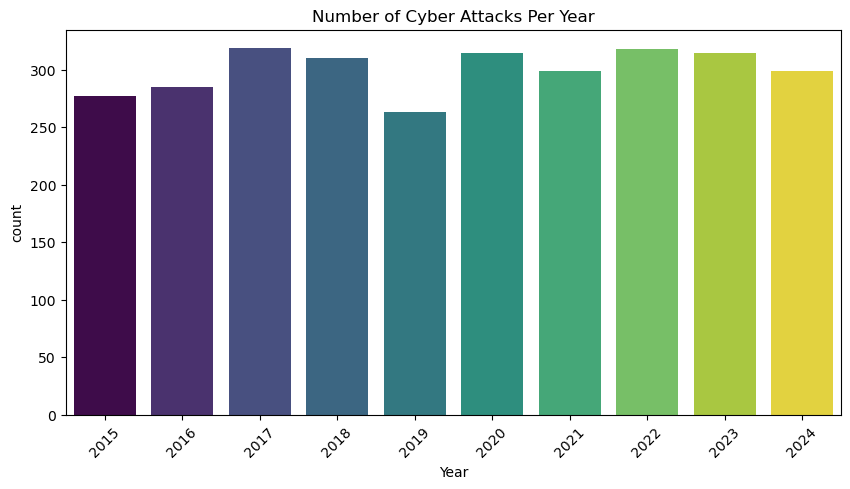

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Year", hue="Year", palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Number of Cyber Attacks Per Year")
plt.show()

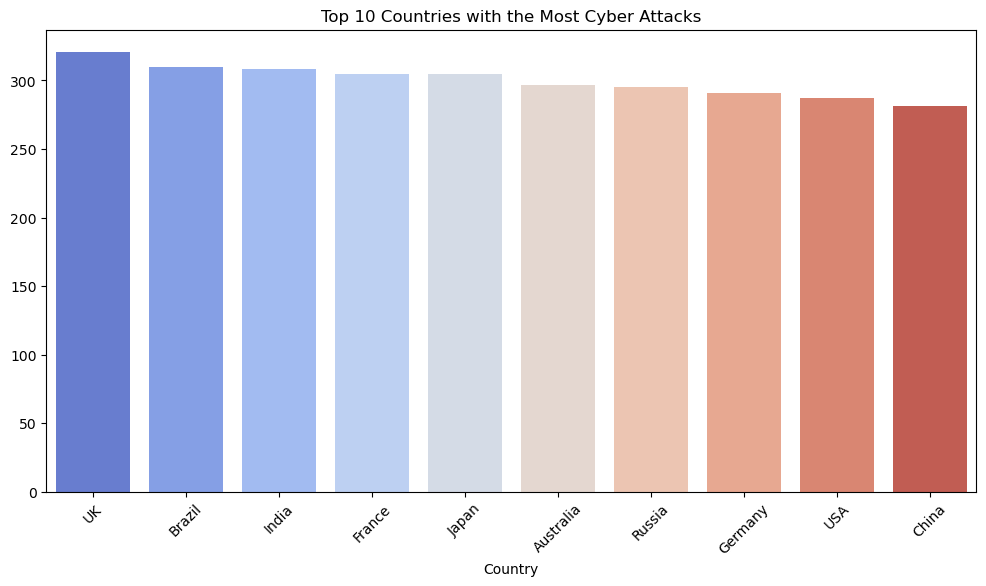

In [13]:
#countries with most cyber attacks

plt.figure(figsize=(12, 6))
top_countries = df["Country"].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette="coolwarm", legend=False)
plt.title("Top 10 Countries with the Most Cyber Attacks")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6388\1350343715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Attack Type", order=df["Attack Type"].value_counts().index, palette="inferno")


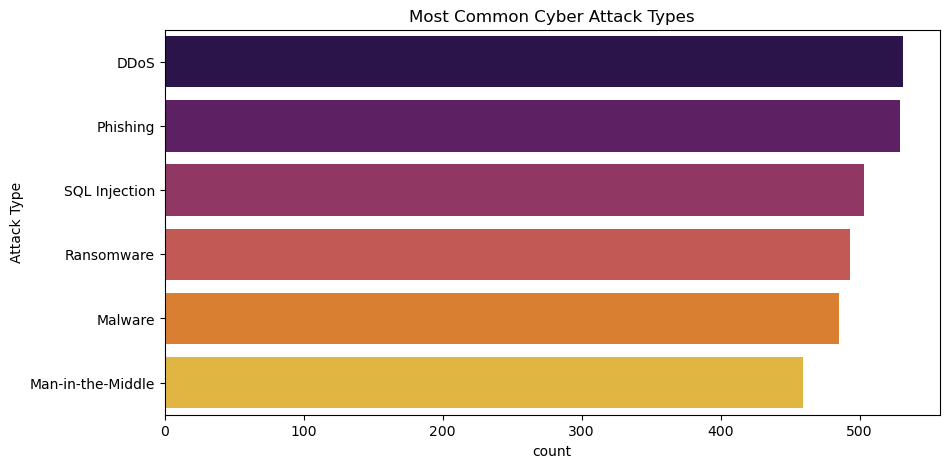

In [14]:
#most attack type

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Attack Type", order=df["Attack Type"].value_counts().index, palette="inferno")
plt.title("Most Common Cyber Attack Types")
plt.show()


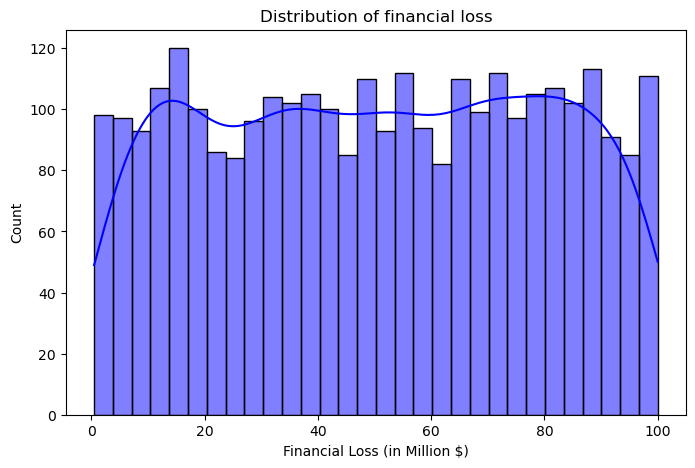

In [15]:
#financial loss distribution

plt.figure(figsize=(8,5))
sns.histplot(df["Financial Loss (in Million $)"], bins=30, kde=True, color="blue")
plt.title("Distribution of financial loss")
plt.show()

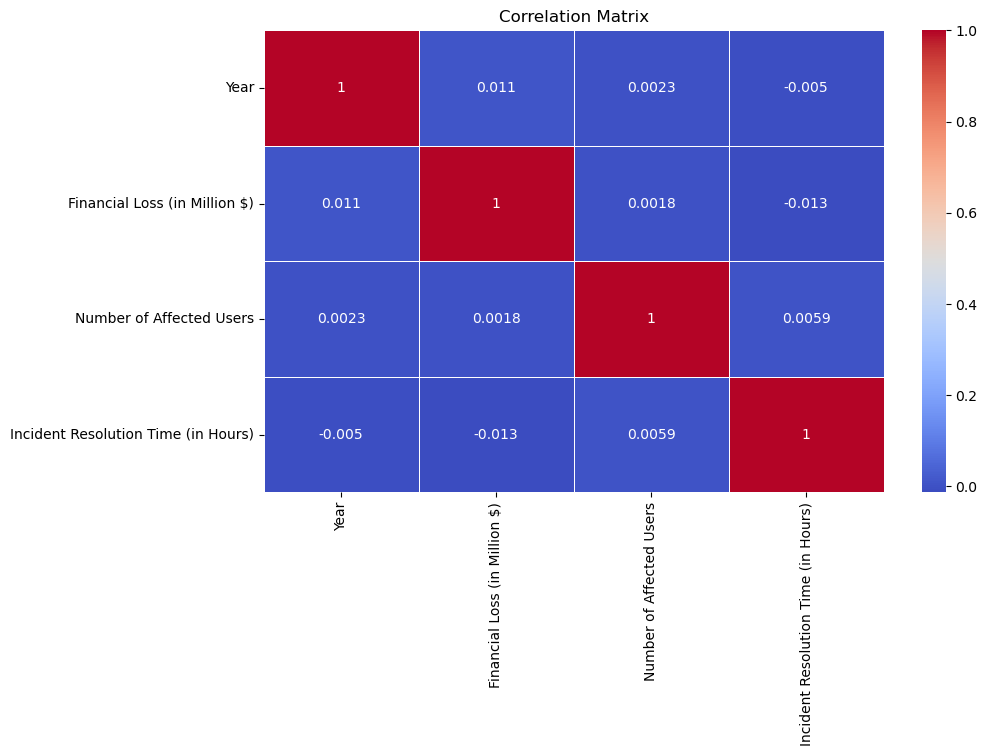

In [16]:
# Filter the dataframe to only contain numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


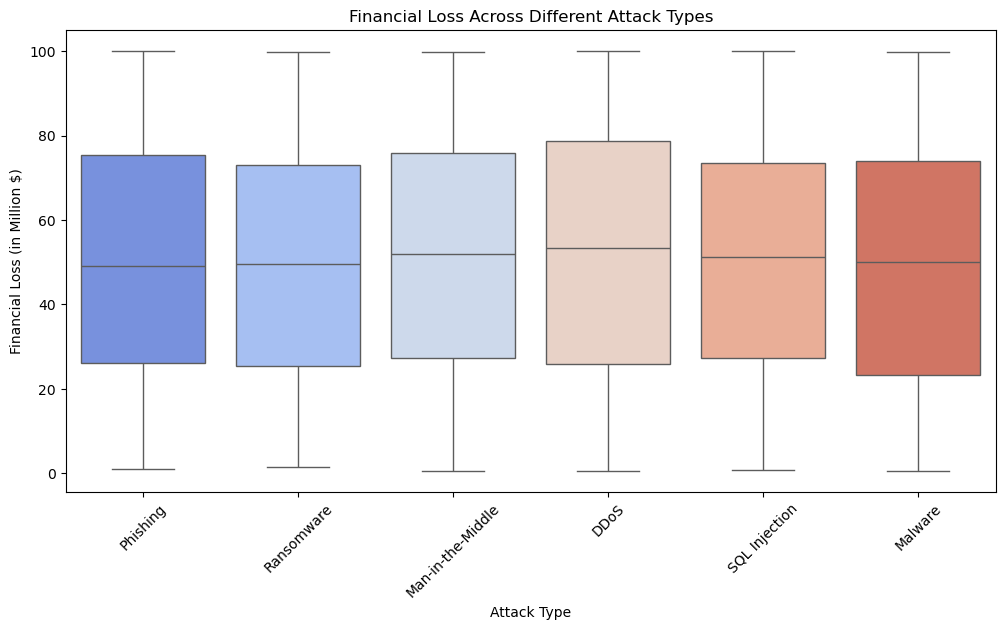

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Attack Type", y="Financial Loss (in Million $)", data=df, hue="Attack Type", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Financial Loss Across Different Attack Types")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17000\3685227484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target Industry", y="Number of Affected Users", data=df, palette="magma")


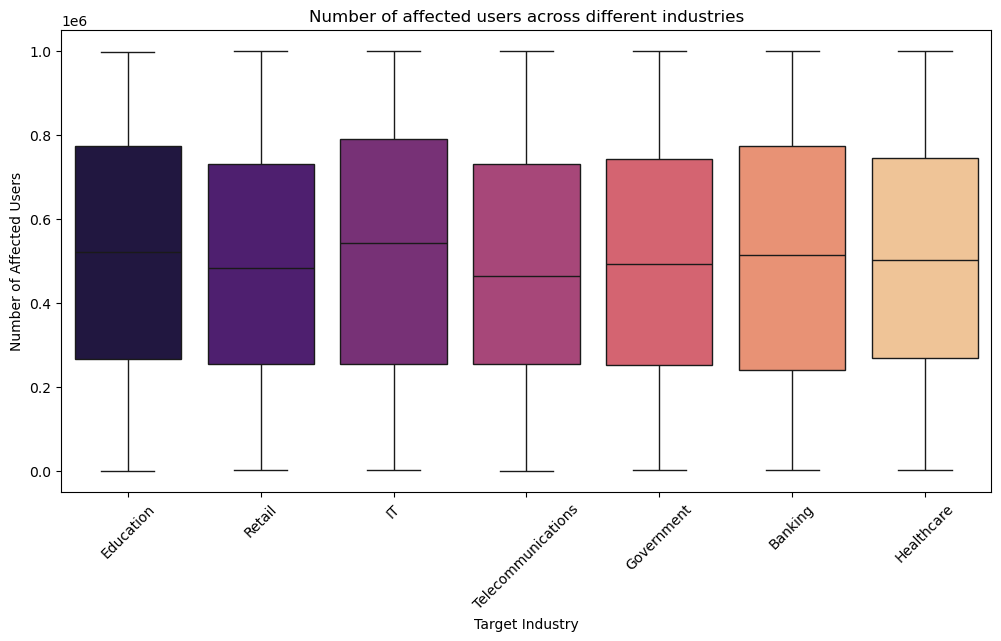

In [18]:
#Industries affexted more

plt.figure(figsize=(12,6))
sns.boxplot(x="Target Industry", y="Number of Affected Users", data=df, palette="magma")
plt.xticks(rotation=45)
plt.title("Number of affected users across different industries")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6388\48986273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Security Vulnerability Type", y="Incident Resolution Time (in Hours)", data=df, palette="viridis")


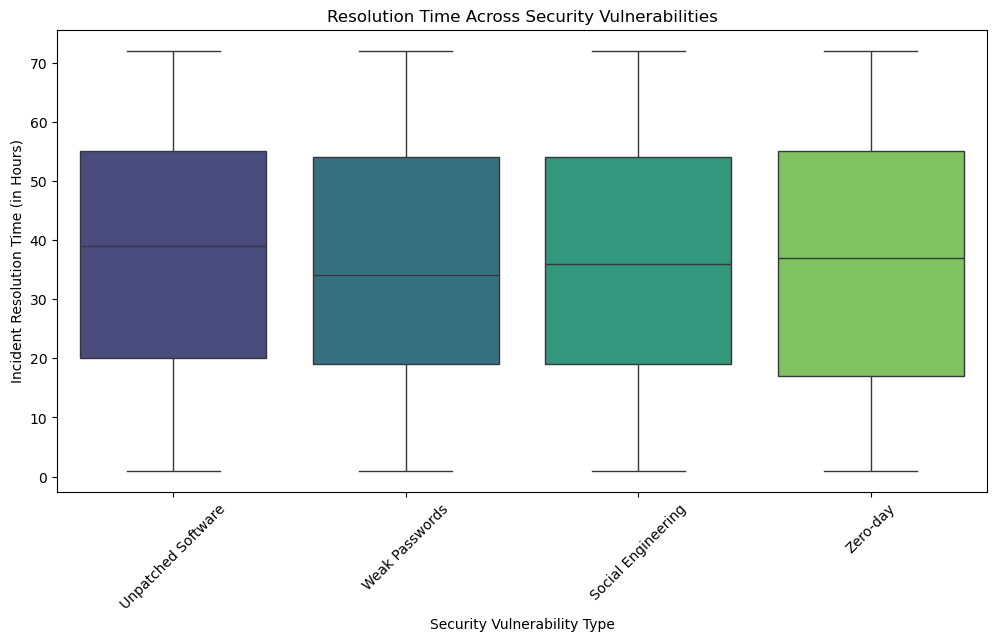

In [18]:
#Resolution time

plt.figure(figsize=(12, 6))
sns.boxplot(x="Security Vulnerability Type", y="Incident Resolution Time (in Hours)", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Resolution Time Across Security Vulnerabilities")
plt.show()


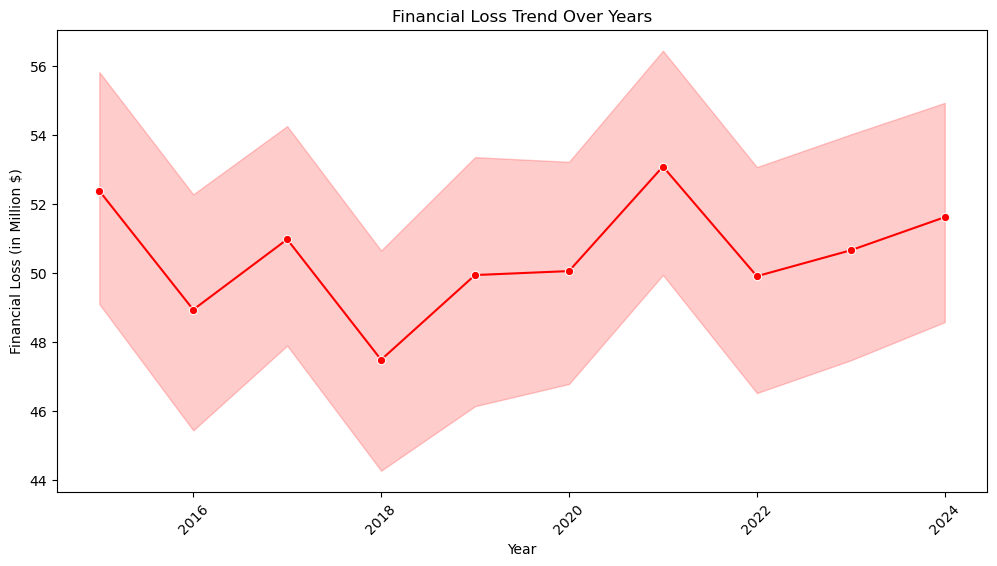

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Financial Loss (in Million $)", data=df, marker="o", color="red")
plt.xticks(rotation=45)
plt.title("Financial Loss Trend Over Years")
plt.show()


In [24]:
df["Resolution Efficiency"] = df["Financial Loss (in Million $)"] / df["Incident Resolution Time (in Hours)"]
print(df["Resolution Efficiency"])

0       1.278254
1       0.875915
2       1.932500
3       5.920000
4       1.094265
          ...   
2995    0.988846
2996    1.164615
2997    1.099000
2998    3.574444
2999    0.753125
Name: Resolution Efficiency, Length: 3000, dtype: float64
